In [1]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
token = user_secrets.get_secret("github_repos_wildcard")

In [2]:
repo_url = f"https://{token}@github.com/gaserSami/panther.git"
branch = "autotuner"

In [3]:
!git clone -b {branch} {repo_url}

Cloning into 'panther'...
remote: Enumerating objects: 1301, done.
remote: Counting objects: 100% (283/283), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 1301 (delta 256), reused 238 (delta 237), pack-reused 1018 (from 1)
Receiving objects: 100% (1301/1301), 27.78 MiB | 21.36 MiB/s, done.
Resolving deltas: 100% (839/839), done.


In [4]:
# First uninstall existing torch, torchvision, torchaudio
!pip uninstall -y torch torchvision torchaudio

# Install the specified versions from PyTorch's official CUDA 12.4 wheels
!pip install torch==2.6.0+cu124 torchvision==0.21.0+cu124 torchaudio==2.6.0+cu124 --index-url https://download.pytorch.org/whl/cu124

Found existing installation: torch 2.5.1+cu124
Uninstalling torch-2.5.1+cu124:
  Successfully uninstalled torch-2.5.1+cu124
Found existing installation: torchvision 0.20.1+cu124
Uninstalling torchvision-0.20.1+cu124:
  Successfully uninstalled torchvision-0.20.1+cu124
Found existing installation: torchaudio 2.5.1+cu124
Uninstalling torchaudio-2.5.1+cu124:
  Successfully uninstalled torchaudio-2.5.1+cu124
Looking in indexes: https://download.pytorch.org/whl/cu124
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:000:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:000:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.5 MB/s eta 0:00:000:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 33.6 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 14.7 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 

In [5]:
!mv panther Panther

In [6]:
!ls

Panther


In [7]:
%%writefile /kaggle/working/Panther/pawX/setup.py
from setuptools import setup
from torch.utils.cpp_extension import BuildExtension, CUDAExtension

setup(
    name="pawX",
    ext_modules=[
        CUDAExtension(
            name="pawX",
            sources=[
                "skops.cpp",
                "bindings.cpp",
                "linear.cpp",
                "linear_cuda.cu",
                "cqrrpt.cpp",
                "rsvd.cpp",
                "attention.cpp",
                "conv2d.cpp"
            ],
            # Use system includes and libraries
            include_dirs=["/usr/include/x86_64-linux-gnu"],
            library_dirs=[],
            libraries=["openblas"],
            extra_compile_args={"cxx": ["-O2", "-fopenmp"], "nvcc": ["-O2"]},
            extra_link_args=["-llapacke", "-lopenblas"]
        )
    ],
    cmdclass={"build_ext": BuildExtension},
)

Overwriting /kaggle/working/Panther/pawX/setup.py


In [8]:
!sudo apt-get install liblapacke-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  liblapacke libtmglib-dev libtmglib3
Suggested packages:
  liblapack-doc
The following NEW packages will be installed:
  liblapacke liblapacke-dev libtmglib-dev libtmglib3
0 upgraded, 4 newly installed, 0 to remove and 122 not upgraded.
Need to get 1,071 kB of archives.
After this operation, 12.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libtmglib3 amd64 3.10.0-2ubuntu1 [144 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 liblapacke amd64 3.10.0-2ubuntu1 [435 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libtmglib-dev amd64 3.10.0-2ubuntu1 [134 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 liblapacke-dev amd64 3.10.0-2ubuntu1 [358 kB]
Fetched 1,071 kB in 1s (1,181 kB/s)     
debconf: unable to initialize frontend: Dialog
debconf: (No usable di

In [9]:
!cd /kaggle/working/Panther/pawX; python setup.py install
!cd /kaggle/working/Panther/pawX; pip install --no-build-isolation -e .

/usr/local/lib/python3.11/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.11/dist-packages/setuptools/_distutils/cmd.py:66: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://github.com/py

In [10]:
import torch
print(torch.__version__)
import triton
print(triton.__version__)

2.6.0+cu124
3.2.0


In [11]:
import os
os.chdir("/kaggle/working/Panther")

In [12]:
!pwd

/kaggle/working/Panther


In [13]:
!pip install botorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 738.3/738.3 kB 11.3 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.7/277.7 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.3/176.3 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 5.4 MB/s eta 0:00:00


Using device: cuda
model: modelModel(
  (fc1): Linear(in_features=20, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (conv): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (attention): MultiheadAttention(
    (out_proj): NonDynamicallyQuantizableLinear(in_features=16, out_features=16, bias=True)
  )
  (output): Linear(in_features=544, out_features=1, bias=True)
)

Training the model model...
Epoch 1/5, Loss: 1.3264
Epoch 2/5, Loss: 1.3139
Epoch 3/5, Loss: 1.0690
Epoch 4/5, Loss: 1.0472
Epoch 5/5, Loss: 0.9436
Training completed!
Replacing model linear layers with sketched versions (no tuning)...
Replaced fc2 with sketched version using parameters: {'num_terms': 1, 'low_rank': 8}
Replaced fc1 with sketched version using parameters: {'num_terms': 1, 'low_rank': 8}
Replaced conv with sketched version using parameters: {'num_terms': 1, 'low_rank

/kaggle/working/Panther/panther/utils/SkAutoTuner/SKAutoTuner.py:218: UserWarning: The sketching layer uses more parameters than a fully connected layer. Consider reducing 'num_terms' or 'low_rank' for efficiency.
  sketched_layer = sketched_class(
/kaggle/working/Panther/panther/utils/SkAutoTuner/SKAutoTuner.py:218: UserWarning: Tensor Core not utilized. Ensure 'in_features', 'out_features', and 'low_rank' are multiples of 16 (current: 32, 16, 8).
  sketched_layer = sketched_class(
/kaggle/working/Panther/panther/utils/SkAutoTuner/SKAutoTuner.py:218: UserWarning: Tensor Core not utilized. Ensure 'in_features', 'out_features', and 'low_rank' are multiples of 16 (current: 20, 32, 8).
  sketched_layer = sketched_class(


Original model inference time: 0.6346 ms
Replaced model inference time: 1.4597 ms
Speedup: 0.43x
==============testing grid search=================

Running search tuning...
Trying parameters: {'num_terms': 1, 'low_rank': 16}
Replaced fc2 with sketched version using parameters: {'num_terms': 1, 'low_rank': 16}
Replaced fc1 with sketched version using parameters: {'num_terms': 1, 'low_rank': 16}
run: 1/1 - accuracy_score: 0.9999975668627115, speed_score: 916.4772590706973, final score: 916.4772590706973
Tried parameters: {'num_terms': 1, 'low_rank': 16}, accuracy_score: 0.9999975668627115, speed_score: 916.4772590706973, final score: 916.4772590706973
Trying parameters: {'num_terms': 1, 'low_rank': 32}
Replaced fc2 with sketched version using parameters: {'num_terms': 1, 'low_rank': 32}
Replaced fc1 with sketched version using parameters: {'num_terms': 1, 'low_rank': 32}
run: 1/1 - accuracy_score: 0.9999497010084194, speed_score: 921.895970019672, final score: 921.895970019672
Tried par

/kaggle/working/Panther/panther/utils/SkAutoTuner/SKAutoTuner.py:218: UserWarning: Tensor Core not utilized. Ensure 'in_features', 'out_features', and 'low_rank' are multiples of 16 (current: 20, 32, 16).
  sketched_layer = sketched_class(
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: UserWarning: Batch size 1 is not a multiple of 16. Tensor Core optimizations disabled.
  return forward_call(*args, **kwargs)
/kaggle/working/Panther/panther/utils/SkAutoTuner/SKAutoTuner.py:218: UserWarning: Tensor Core not utilized. Ensure 'in_features', 'out_features', and 'low_rank' are multiples of 16 (current: 20, 32, 32).
  sketched_layer = sketched_class(


run: 1/1 - accuracy_score: 0.9998993464218353, speed_score: 884.7622663797831, final score: 884.7622663797831
Tried parameters: {'num_terms': 3, 'low_rank': 32}, accuracy_score: 0.9998993464218353, speed_score: 884.7622663797831, final score: 884.7622663797831
Tuning layer: conv
Trying parameters: {'num_terms': 3, 'low_rank': 100}
Replaced conv with sketched version using parameters: {'num_terms': 3, 'low_rank': 100}
run: 1/1 - accuracy_score: 0.9071211751855756, speed_score: 1422.9797628538954, final score: 1422.9797628538954
Tried parameters: {'num_terms': 3, 'low_rank': 100}, accuracy_score: 0.9071211751855756, speed_score: 1422.9797628538954, final score: 1422.9797628538954
Trying parameters: {'num_terms': 3, 'low_rank': 50}
Replaced conv with sketched version using parameters: {'num_terms': 3, 'low_rank': 50}
run: 1/1 - accuracy_score: 0.9924709352234456, speed_score: 1424.1635258565075, final score: 1424.1635258565075
Tried parameters: {'num_terms': 3, 'low_rank': 50}, accuracy_s

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Visualization saved to layer_param_tuning_results.png


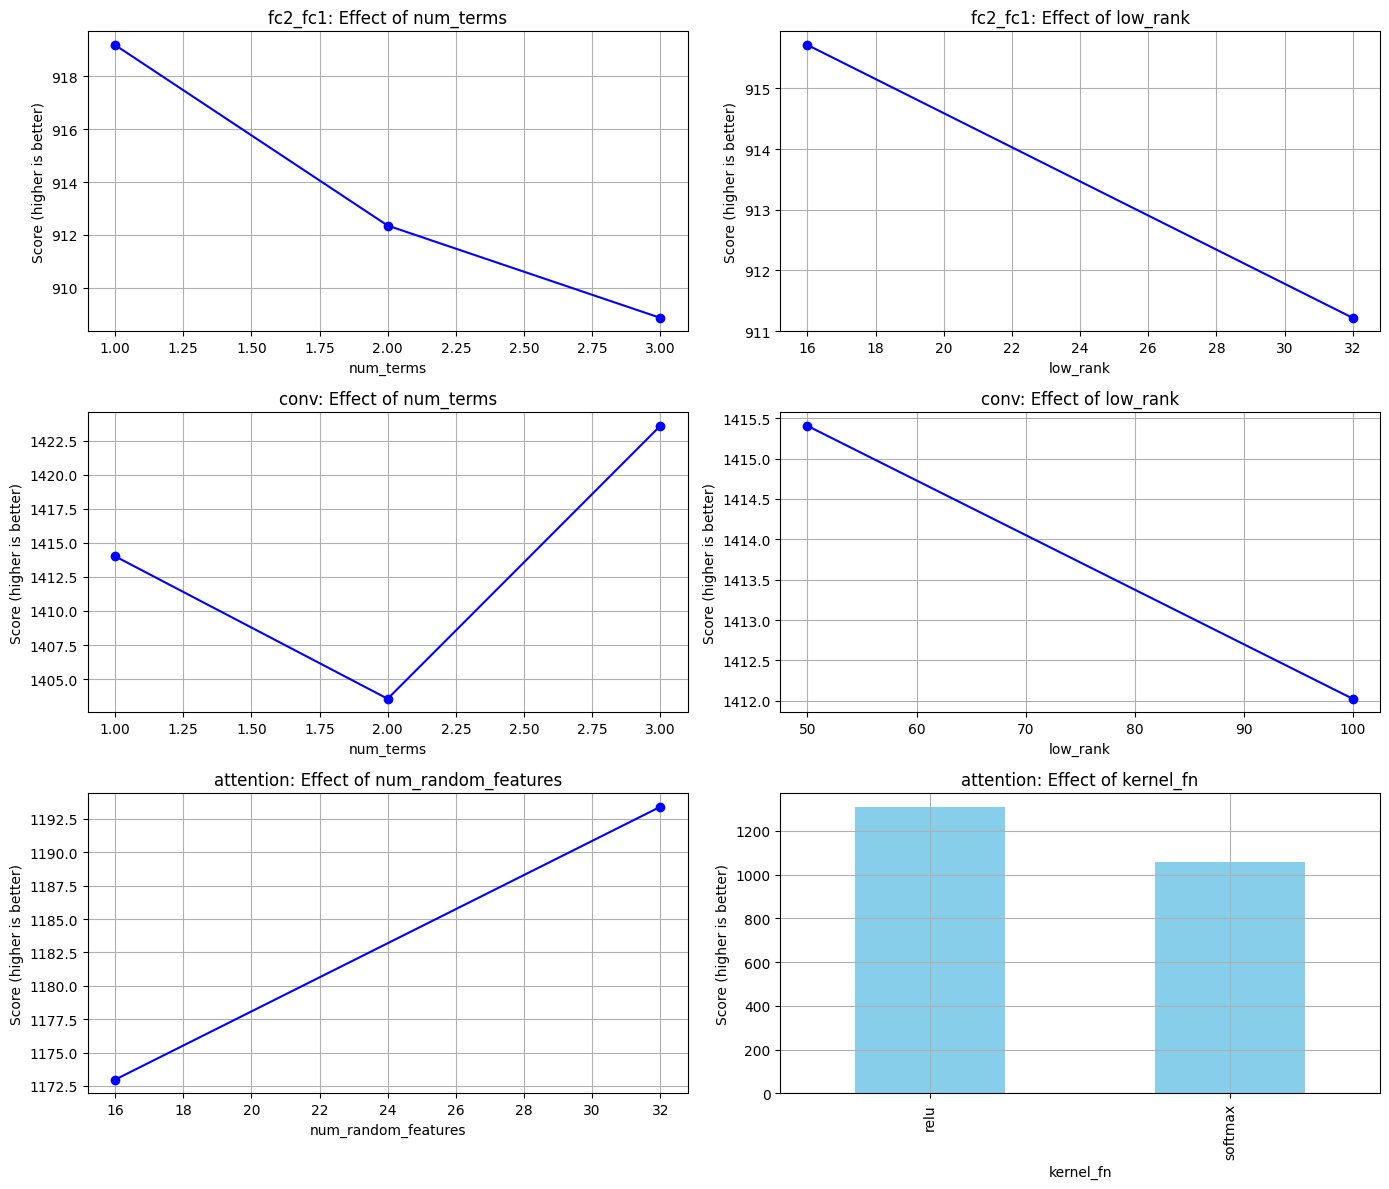

==============testing Random Search=================

TESTING MODEL TUNING WITH OPTIMIZATION


Running model tuning...
Trying parameters: {'num_terms': 1, 'low_rank': 8}
Replaced fc2 with sketched version using parameters: {'num_terms': 1, 'low_rank': 8}
Replaced fc1 with sketched version using parameters: {'num_terms': 1, 'low_rank': 8}
run: 1/1 - accuracy_score: 0.9950457916841525, speed_score: 930.0215082374333, final score: 930.0215082374333
Tried parameters: {'num_terms': 1, 'low_rank': 8}, accuracy_score: 0.9950457916841525, speed_score: 930.0215082374333, final score: 930.0215082374333
Trying parameters: {'num_terms': 1, 'low_rank': 16}
Replaced fc2 with sketched version using parameters: {'num_terms': 1, 'low_rank': 16}
Replaced fc1 with sketched version using parameters: {'num_terms': 1, 'low_rank': 16}
run: 1/1 - accuracy_score: 0.9964725690576972, speed_score: 901.3999269304334, final score: 901.3999269304334
Tried parameters: {'num_terms': 1, 'low_rank': 16}, accuracy_score

/kaggle/working/Panther/panther/utils/SkAutoTuner/SKAutoTuner.py:218: UserWarning: The sketching layer uses more parameters than a fully connected layer. Consider reducing 'num_terms' or 'low_rank' for efficiency.
  sketched_layer = sketched_class(
/kaggle/working/Panther/panther/utils/SkAutoTuner/SKAutoTuner.py:218: UserWarning: Tensor Core not utilized. Ensure 'in_features', 'out_features', and 'low_rank' are multiples of 16 (current: 32, 16, 8).
  sketched_layer = sketched_class(
/kaggle/working/Panther/panther/utils/SkAutoTuner/SKAutoTuner.py:218: UserWarning: Tensor Core not utilized. Ensure 'in_features', 'out_features', and 'low_rank' are multiples of 16 (current: 20, 32, 8).
  sketched_layer = sketched_class(
/kaggle/working/Panther/panther/utils/SkAutoTuner/SKAutoTuner.py:218: UserWarning: Tensor Core not utilized. Ensure 'in_features', 'out_features', and 'low_rank' are multiples of 16 (current: 20, 32, 16).
  sketched_layer = sketched_class(
/usr/local/lib/python3.11/dist-pa

run: 1/1 - accuracy_score: 0.9998348989827875, speed_score: 989.7011526799514, final score: 989.7011526799514
Tried parameters: {'num_random_features': 16, 'kernel_fn': 'softmax'}, accuracy_score: 0.9998348989827875, speed_score: 989.7011526799514, final score: 989.7011526799514
Trying parameters: {'num_random_features': 16, 'kernel_fn': 'relu'}
Replaced attention with sketched version using parameters: {'num_random_features': 16, 'kernel_fn': 'relu'}
run: 1/1 - accuracy_score: 0.9999931307446629, speed_score: 1310.80192512032, final score: 1310.80192512032
Tried parameters: {'num_random_features': 16, 'kernel_fn': 'relu'}, accuracy_score: 0.9999931307446629, speed_score: 1310.80192512032, final score: 1310.80192512032
Trying parameters: {'num_random_features': 32, 'kernel_fn': 'softmax'}
Replaced attention with sketched version using parameters: {'num_random_features': 32, 'kernel_fn': 'softmax'}
run: 1/1 - accuracy_score: 0.9999923829898697, speed_score: 1048.156737305078, final scor

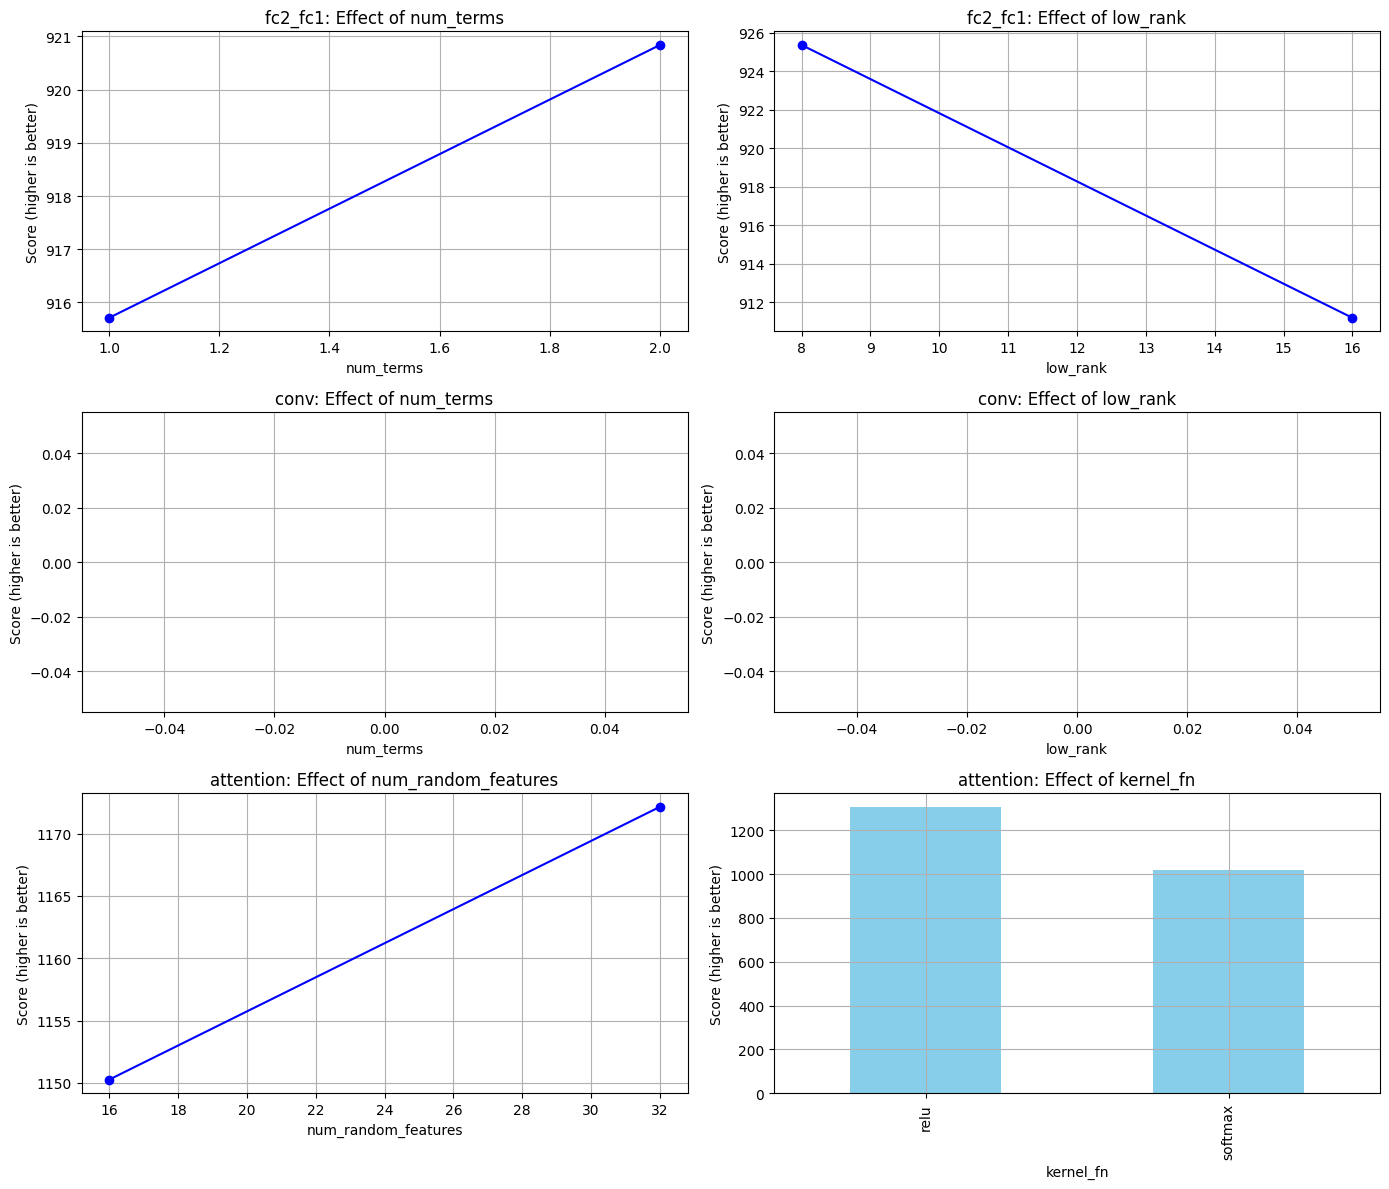

In [17]:
import os
import time
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader

# Import components
from panther.tuner.SkAutoTuner.SKAutoTuner import SKAutoTuner
from panther.tuner.SkAutoTuner.Configs.LayerConfig import LayerConfig
from panther.tuner.SkAutoTuner.Configs.TuningConfigs import TuningConfigs
from panther.tuner.SkAutoTuner.Searching.GridSearch import GridSearch
from panther.tuner.SkAutoTuner.Searching.RandomSearch import RandomSearch
from panther.tuner.SkAutoTuner.Searching.BayesianOptimization import BayesianOptimization
from panther.nn.linear_tr import SKLinear_triton
from panther.nn.conv2d import SKConv2d
from panther.nn.attention import RandMultiHeadAttention

# Setting up device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

##################################### HELPERS #######################################

def dump_tensor_info(tensor, name="Tensor"):
    """Print details about a tensor"""
    print(f"{name}: shape={tensor.shape}, dtype={tensor.dtype}, device={tensor.device}")
    print(f"  - Values: min={tensor.min().item():.4f}, max={tensor.max().item():.4f}, mean={tensor.mean().item():.4f}")
    print(f"  - First few values: {tensor.flatten()[:5]}")

def measure_time(func, *args, n_runs=100, warmup=10):
  """Measure execution time of a function"""
  # Warmup
  for _ in range(warmup):
      func(*args)

  # Timed runs
  start = time.time()
  for _ in range(n_runs):
      func(*args)
  end = time.time()

  return (end - start) / n_runs

# Define accuracy evaluation function for model model
def model_accuracy_func(model):
    # In a real scenario, this would compute accuracy on validation data
    # For this example, we'll use a simple proxy for accuracy:
    # How close the model's output is to the expected output

    # Get reference output from the original trained model
    with torch.no_grad():
        reference_output = model_trained(
            model_feat_input,
            model_img_input,
            model_seq_input
        )
        
        test_output = model(
            model_feat_input,
            model_img_input,
            model_seq_input
        )
    
    # Calculate mean squared error between outputs
    mse = nn.functional.mse_loss(test_output, reference_output)
    # Convert to a similarity score where higher is better (max is 1.0)
    similarity = 1.0 / (1.0 + mse.item())
    
    return similarity

# Define speed evaluation function for model model (higher is better)
def model_speed_func(model):
    # Create forward pass function for timing
    def forward_pass(model, feat, img, seq):
        with torch.no_grad():
            return model(feat, img, seq)
    
    inference_time = measure_time(
        forward_pass, 
        model, 
        model_feat_input, 
        model_img_input, 
        model_seq_input,
        n_runs=20
    )
    return 1.0 / inference_time  # Higher is better

# Define evaluation function for model model
def model_eval_func(model):
    # Create forward pass function for timing
    def forward_pass(model, feat, img, seq):
        with torch.no_grad():
            return model(feat, img, seq)
    
    inference_time = measure_time(
        forward_pass, 
        model, 
        model_feat_input, 
        model_img_input, 
        model_seq_input,
        n_runs=20
    )
    return 1.0 / inference_time  # Higher is better

def test_tuner(configs_to_use, search_algorithm):
    # Create a fresh copy of the model for tuning
    model_tunned_grid = modelModel().to(device)
    model_tunned_grid.load_state_dict(model_trained.state_dict())
    # Create tuner with search - make sure we start with the original model
    grid_tuner = SKAutoTuner(
        model=model_tunned_grid,
        configs=configs_to_use,
        accuracy_eval_func=model_accuracy_func,
        search_algorithm=search_algorithm,
        accuracy_threshold=0,  # Set a threshold for accuracy
        optmization_eval_func=model_speed_func,
        verbose=True
    )

    # Run tuning
    print("\nRunning search tuning...")
    start_time = time.time()
    best_params = grid_tuner.tune()
    tuning_time = time.time() - start_time
    print(f"Tuning completed in {tuning_time:.2f} seconds")
    print(f"Best parameters: {best_params}")
    print(f"Best parameters from getParams: {grid_tuner.get_best_params()}")

    # check the tunned model should be the same as the original model exactly
    print("\nTunned model layer types before applying best params:")
    for name, module in model_tunned_grid.named_modules():
        print(f"{name}: {type(module).__name__}")

    # assertions on the tunner model to be the exact same model before tunning
    # Since tuning doesn't change the layers until apply_best_params is called,
    # let's verify that the layers are still the original types and have the same parameters
    for name, module in model_tunned_grid.named_modules():
        if "." not in name:  # Skip the main module
            continue
        
        # Get the corresponding module from the original trained model
        original_module = model_trained.get_submodule(name)
        
        # First check that the types are the same (no sketched layers yet)
        assert type(module) == type(original_module), f"Layer {name} has been changed from {type(original_module)} to {type(module)}!"
        
        # For layers with parameters, check they are identical
        if isinstance(module, nn.Linear):
            assert torch.allclose(module.weight, original_module.weight), f"Layer {name} weight mismatch!"
            if module.bias is not None and original_module.bias is not None:
                assert torch.allclose(module.bias, original_module.bias), f"Layer {name} bias mismatch!"
            print(f"Layer {name} is still a normal Linear layer with identical parameters.")
        
        elif isinstance(module, nn.Conv2d):
            assert torch.allclose(module.weight, original_module.weight), f"Layer {name} weight mismatch!"
            if module.bias is not None and original_module.bias is not None:
                assert torch.allclose(module.bias, original_module.bias), f"Layer {name} bias mismatch!"
            print(f"Layer {name} is still a normal Conv2d layer with identical parameters.")
        
        elif isinstance(module, nn.MultiheadAttention):
            assert torch.allclose(module.in_proj_weight, original_module.in_proj_weight), f"Layer {name} in_proj_weight mismatch!"
            assert torch.allclose(module.out_proj.weight, original_module.out_proj.weight), f"Layer {name} out_proj.weight mismatch!"
            
            if module.in_proj_bias is not None and original_module.in_proj_bias is not None:
                assert torch.allclose(module.in_proj_bias, original_module.in_proj_bias), f"Layer {name} in_proj_bias mismatch!"
            if module.out_proj.bias is not None and original_module.out_proj.bias is not None:
                assert torch.allclose(module.out_proj.bias, original_module.out_proj.bias), f"Layer {name} out_proj.bias mismatch!"
            
            print(f"Layer {name} is still a normal MultiheadAttention layer with identical parameters.")

    # Apply best parameters
    model_tunned_grid = grid_tuner.apply_best_params()

    # check the tunned model should reflect the applied best parameters
    print("\nTunned model layer types after applying best params:")
    for name, module in model_tunned_grid.named_modules():
        print(f"{name}: {type(module).__name__}")

    # Analyze results
    results_df = grid_tuner.get_results_dataframe()
    print("\nTuning results summary:")
    print(results_df)

    # visualize the tunning results using the new methods
    print("\nVisualizing tuning results...")
    # Use the built-in visualization methods
    grid_tuner.visualize_tuning_results(save_path="layer_param_tuning_results.png")

##############################################################################################################

class modelModel(nn.Module):
    def __init__(self, feat_dim=20, seq_len=10, img_channels=3, img_size=16):
        super().__init__()
        self.feat_dim = feat_dim
        self.seq_len = seq_len
        self.img_size = img_size
        
        # Linear part
        self.fc1 = nn.Linear(feat_dim, 32)
        self.fc2 = nn.Linear(32, 16)
        
        # CNN part
        self.conv = nn.Conv2d(img_channels, 8, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2)
        
        # Attention part
        self.attention = nn.MultiheadAttention(
            embed_dim=16,
            num_heads=2,
            batch_first=True
        )
        
        # Output
        # We'll combine outputs from all parts
        flat_cnn_size = 8 * (img_size // 2) * (img_size // 2)
        combined_size = 16 + flat_cnn_size + 16
        self.output = nn.Linear(combined_size, 1)
    
    def forward(self, feat, img, seq):
        # Process features with linear layers
        feat_out = nn.functional.relu(self.fc1(feat))
        feat_out = self.fc2(feat_out)
        
        # Process image with CNN
        cnn_out = nn.functional.relu(self.conv(img))
        cnn_out = self.pool(cnn_out)
        cnn_out = cnn_out.reshape(cnn_out.size(0), -1)  # Use reshape instead of view
        
        # Process sequence with attention
        seq_out, _ = self.attention(seq, seq, seq)
        seq_out = seq_out[:, 0, :]  # Use first token
        
        # Combine all outputs
        combined = torch.cat([feat_out, cnn_out, seq_out], dim=1)
        output = self.output(combined)
        
        return output

# model data
model_feat = torch.randn(50, 20).to(device)
model_img = torch.randn(50, 3, 16, 16).to(device)
model_seq = torch.randn(50, 10, 16).to(device)
model_labels = torch.randn(50, 1).to(device)
# Single input examples for inference
model_feat_input = torch.randn(1, 20).to(device)
model_img_input = torch.randn(1, 3, 16, 16).to(device)
model_seq_input = torch.randn(1, 10, 16).to(device)

# create the model to train
model_trained = modelModel().to(device)
print(f"model: {model_trained}")

# Train the model
print("\nTraining the model model...")
criterion = nn.MSELoss()
optimizer = optim.Adam(model_trained.parameters(), lr=0.001)

# Create dataset and dataloader
model_dataset = TensorDataset(model_feat, model_img, model_seq, model_labels)
model_loader = DataLoader(model_dataset, batch_size=10, shuffle=True)

# Training loop
epochs = 5
for epoch in range(epochs):
    running_loss = 0.0
    for feat_batch, img_batch, seq_batch, labels_batch in model_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model_trained(feat_batch, img_batch, seq_batch)
        
        # Calculate loss
        loss = criterion(outputs, labels_batch)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(model_loader):.4f}")

print("Training completed!")

########################################################### now we have a model trained #####################

# Test direct layer replacement (without tuning)

model_replaced = modelModel().to(device)
model_replaced.load_state_dict(model_trained.state_dict())

# Create config for model model (multiple layer types)
configs_to_use = TuningConfigs([
    LayerConfig(
        # Using a list of strings (all "fc" layers)
        layer_names=["fc1", "fc2"],
        params={
            "num_terms": [1, 2],
            "low_rank": [8, 16],
        },
        separate=False  # Tune linear layers together
    ),
    LayerConfig(
        # Using a simple string (can also be a regex pattern)
        layer_names="conv",
        params={
            "num_terms": [1, 2],
            "low_rank": [4, 8],
        },
        separate=True
    ),
    LayerConfig(
        # Using a dictionary with type-based selection (alternative approach)
        layer_names={"pattern": "attention", "type": "MultiheadAttention"},
        params={
            "num_random_features": [16, 32],
            "kernel_fn": ["softmax", "relu"],
        },
        separate=True
    )
])

# Create tuner for model model
model_tuner = SKAutoTuner(
    model=model_replaced,
    configs=configs_to_use,
    accuracy_eval_func=model_accuracy_func,
    search_algorithm=GridSearch(),
    verbose=True
)

print("Replacing model linear layers with sketched versions (no tuning)...")
model_replaced = model_tuner.replace_without_tuning()

# print the state dicts
print("\nOriginal model layer types:")
for name, module in model_trained.named_modules():
    print(f"{name}: {type(module).__name__}")

print("\nReplaced model layer types:")
for name, module in model_replaced.named_modules():
    print(f"{name}: {type(module).__name__}")

# Test if model still works
print("\nTesting if replaced model still works...")
with torch.no_grad():
    replaced_output = model_replaced(
        model_feat_input, 
        model_img_input, 
        model_seq_input
    )

# Time comparison
def model_forward(model, feat, img, seq):
    with torch.no_grad():
        return model(feat, img, seq)
    
print("\nComparing inference times:")
original_time = measure_time(model_forward, model_trained, model_feat_input, model_img_input, model_seq_input, n_runs=100)
replaced_time = measure_time(model_forward, model_replaced, model_feat_input, model_img_input, model_seq_input, n_runs=100)

print(f"Original model inference time: {original_time * 1000:.4f} ms")
print(f"Replaced model inference time: {replaced_time * 1000:.4f} ms")
print(f"Speedup: {original_time / replaced_time:.2f}x")

# Create config for model model (multiple layer types)
configs_to_use = TuningConfigs([
    LayerConfig(
        # Different ways to specify layer names - using a list of strings
        layer_names=["fc1", "fc2"],
        params={
            "num_terms": [1, 2, 3],
            "low_rank": [16, 32],
        },
        separate=False  # Tune linear layers together
    ),
    LayerConfig(
        # Using a dictionary with pattern selection
        layer_names={"pattern": "conv", "indices": [0]},  # Select the first conv layer
        params={
            "num_terms": [3, 2, 1],
            "low_rank": [100, 50],
        },
        separate=True
    ),
    LayerConfig(
        # Using a regex pattern directly
        layer_names={"pattern": "attention.*", "type" : "MultiheadAttention"},
        params={
            "num_random_features": [16, 32],
            "kernel_fn": ["softmax", "relu"],
        },
        separate=True
    )
])

print("==============testing grid search=================")
test_tuner(configs_to_use, GridSearch())
print("==============testing Random Search=================")
# test_tuner(configs_to_use, RandomSearch())
# print("==============testing Bayesian Search=================")
# test_tuner(configs_to_use, BayesianOptimization())

# Test model tuning and compare inference times

print("\n" + "="*50)
print("TESTING MODEL TUNING WITH OPTIMIZATION")
print("="*50 + "\n")

# Create a fresh copy of the model for tuning
model_tuned = modelModel().to(device)
model_tuned.load_state_dict(model_trained.state_dict())

# Create config for model tuning
tuning_configs = TuningConfigs([
    LayerConfig(
        # Using a list of strings (all "fc" layers)
        layer_names=["fc1", "fc2"],
        params={
            "num_terms": [1, 2],
            "low_rank": [8, 16],
        },
        separate=False  # Tune linear layers together
    ),
    LayerConfig(
        # Using a simple string (can also be a regex pattern)
        layer_names="conv",
        params={
            "num_terms": [1, 2],
            "low_rank": [4, 8],
        },
        separate=True
    ),
    LayerConfig(
        # Using a dictionary with type-based selection
        layer_names={"pattern": "attention", "type": "MultiheadAttention"},
        params={
            "num_random_features": [16, 32],
            "kernel_fn": ["softmax", "relu"],
        },
        separate=True
    )
])

# Create tuner with accuracy and speed evaluation
model_auto_tuner = SKAutoTuner(
    model=model_tuned,
    configs=tuning_configs,
    accuracy_eval_func=model_accuracy_func,
    search_algorithm=GridSearch(),
    accuracy_threshold=0.9,  # Set a threshold for accuracy
    optmization_eval_func=model_speed_func,
    verbose=True
)

# Run tuning
print("\nRunning model tuning...")
start_time = time.time()
best_params = model_auto_tuner.tune()
tuning_time = time.time() - start_time
print(f"Tuning completed in {tuning_time:.2f} seconds")
print(f"Best parameters: {best_params}")

# Apply best parameters
print("\nApplying best parameters to the model...")
model_tuned = model_auto_tuner.apply_best_params()

# print the state dicts
print("\nOriginal model layer types:")
for name, module in model_trained.named_modules():
    print(f"{name}: {type(module).__name__}")

print("\nTuned model layer types:")
for name, module in model_tuned.named_modules():
    print(f"{name}: {type(module).__name__}")

# Test if model still works
print("\nTesting if tuned model still works...")
with torch.no_grad():
    tuned_output = model_tuned(
        model_feat_input, 
        model_img_input, 
        model_seq_input
    )
    original_output = model_trained(
        model_feat_input, 
        model_img_input, 
        model_seq_input
    )
    
    # Calculate mean squared error between outputs
    mse = nn.functional.mse_loss(tuned_output, original_output)
    print(f"MSE between original and tuned model outputs: {mse.item():.6f}")

# Time comparison
def model_forward(model, feat, img, seq):
    with torch.no_grad():
        return model(feat, img, seq)
    
print("\nComparing inference times:")
original_time = measure_time(model_forward, model_trained, model_feat_input, model_img_input, model_seq_input, n_runs=100)
tuned_time = measure_time(model_forward, model_tuned, model_feat_input, model_img_input, model_seq_input, n_runs=100)

print(f"Original model inference time: {original_time * 1000:.4f} ms")
print(f"Tuned model inference time: {tuned_time * 1000:.4f} ms")
print(f"Speedup: {original_time / tuned_time:.2f}x")

# Visualize tuning results
print("\nVisualizing tuning results...")
model_auto_tuner.visualize_tuning_results(save_path="model_tuning_results.png")